# Examen 1 - Portafolios de inversión - P2023. Tipo 2.



## I. Primera parte (50%)

## **Pregunta 1.** La varianza de un portafolio compuesto por $n$ activos es

$$
\sigma_p^{2} = \sum_{i=1}^{n}\sum_{k=1}^{n} w_i w_k \sigma_{ik}
$$

donde $w_i$ es la ponderación del activo $i\in\{1, 2, \dots, n\}$ en el portafolio, y $\sigma_{ik}$ es la covarianza entre los activos $i$ y $k$.

## Explique de donde sale la formula anterior, de una interpretación de la misma y porque de ahí sale que la varianza del portafolio es igual a:

$$Var(P) = w_1^2\sigma_1 ^2 + w_2^2 \sigma_2 ^2  + 2 w_1 w_2 cov(1,2)$$

### Respuesta

Primero tenemos como norma general que la esperanza es un valor que se asemeja al promedio. Cuando queremos obtener la esperanza de algo, multplicamos la probabilidad de ese algo por la utilidad o el resultado que se obtendria si algo se cumple 
  $$E[x] = \sum_{i=1}^{n} p_i x_i $$

Ahora, si queremos obtener la esperanza de un portafolio, tenemos que multplicar el peso del portafolio, que seria la cantidad de acciones que invertiremos por su promedio; teniendo en cuenta que el promedio seria nuestra utilidad

$$E[p] = \sum_{i=1}^{n} w_i \overline{r_i}$$

Si tenemos varios activos, tenemos que repetir el proceso para cada uno de los activos 

$$E[p] = \sum_{i=1}^{n} w_1 \overline{r_1} + w_2  \overline{r_2}$$

Para calcular la varianza tenemos que recordar la formula de la varianza

$$Var(x) = E[(x - E[x]^2] $$

Que en un portafolio ya sabemos que la varianza es la transpuesta de W; que serian los pesos, multplicados por todas las volatilidades de la cantidad de activos que tengamos, multplicados por la tranpuesta de los activos( La tranpuesta de los activos, es la misma matriz, pero invirtiendo las filas y las columnas

$$Var(p) = W^T \sum W    $$

$$Var(p) = E[(w_i r_1 + w_2 r_2) - (w_1 \overline{r_1} + w_2 \overline{r_2})]^2 $$

$$Var(p) = W^T \sum W    $$

Si hacemos la multplicacion matricial, nos da esto com resultado 

$$Var(p) = w_1^2 \sigma_1^2 +  w_2^2 \sigma_2^2 + 2 w_1 w_2 cov(r1, r2)$$




**Pregunta 2.**

Inventa un ejemplo 10 rendimientos, calcula el rendimiento aritmetico y el geometrico. Explica que significa cada uno a tu yo de primer semestre.


In [91]:
#Importamos las librerias 
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Primer obtenemos los precios que se dieron la final cada dia de cotizacion en la bolsa, desde 2015 hasta ahora

In [92]:
tickers = ['VOO', 'NAFTRAC.MX', 'AAPL', 'MSFT', 'TSLA', 'NVDA', 'GOOGL', 'META', 'JNJ', 'JPM']
start_date = '2015-01-01'
end_date = '2021-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
St

[*********************100%%**********************]  10 of 10 completed


,AAPL,GOOGL,JNJ,JPM,META,MSFT,NAFTRAC.MX,NVDA,TSLA,VOO
Date,,,,,,,,,,
2015-01-02,24.498682,26.477501,82.477386,49.209702,78.449997,40.534851,42.090000,4.833230,14.620667,160.364792
2015-01-05,23.808516,25.973000,81.901329,47.681980,77.190002,40.162098,41.049999,4.751596,14.006000,157.547318
2015-01-06,23.810759,25.332001,81.498878,46.445641,76.150002,39.572624,41.310001,4.607536,14.085333,155.998199
2015-01-07,24.144636,25.257500,83.298027,46.516502,76.150002,40.075401,41.810001,4.595530,14.063333,157.947403
2015-01-08,25.072323,25.345501,83.953018,47.555988,78.180000,41.254337,42.410000,4.768402,14.041333,160.722305
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,129.850601,86.708000,141.772873,115.188263,267.399994,217.364532,43.580002,129.656723,220.589996,325.113678
2020-12-28,134.494766,88.697998,142.442383,115.946808,277.000000,219.521133,44.080002,128.721237,221.229996,327.941559
2020-12-29,132.703979,87.888000,143.325699,115.641556,276.779999,218.730713,44.689999,129.152786,221.996674,327.251343


Copiamos la tabla de datos, por si necesitamos usarla mas adelante. Despues de eso sacamos el cambio porcentual de cada uno de los precios por cada dia. En el primer dia tenemos un NaN, lo que signfica que no hay valor, eso se da, porque para calcular los datos, comparamos dos tablas. Una normal, y otra igual pero adelantada un dia. Por eso al momento de comparar el cambio de los datos no tenemos nada en el primero. Porque como los datos se recorrieron uno, ahi ya no va a haber nada


Para calcular los cambios usamos esta formula 

$$\frac {S_{t+1} - S_t}{S_t} $$


In [93]:
df =  St.copy() 
ren = df.pct_change().dropna()
ren

,AAPL,GOOGL,JNJ,JPM,META,MSFT,NAFTRAC.MX,NVDA,TSLA,VOO
Date,,,,,,,,,,
2015-01-05,-0.028172,-0.019054,-0.006984,-0.031045,-0.016061,-0.009196,-0.024709,-0.016890,-0.042041,-0.017569
2015-01-06,0.000094,-0.024679,-0.004914,-0.025929,-0.013473,-0.014677,0.006334,-0.030318,0.005664,-0.009833
2015-01-07,0.014022,-0.002941,0.022076,0.001526,0.000000,0.012705,0.012104,-0.002606,-0.001562,0.012495
2015-01-08,0.038422,0.003484,0.007863,0.022347,0.026658,0.029418,0.014351,0.037618,-0.001564,0.017569
2015-01-09,0.001073,-0.012211,-0.013629,-0.017387,-0.005628,-0.008405,-0.000707,0.004028,-0.018802,-0.008421
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.007712,0.003431,0.003488,-0.004398,-0.002648,0.007827,-0.005023,-0.001191,0.024443,0.003996
2020-12-28,0.035765,0.022951,0.004722,0.006585,0.035901,0.009922,0.011473,-0.007215,0.002901,0.008698
2020-12-29,-0.013315,-0.009132,0.006201,-0.002633,-0.000794,-0.003601,0.013838,0.003353,0.003466,-0.002105


## Rendimiento aritmetico 

El rendimiento aritmetico es cuanto crece tu inversion expresado en dinero, por lo que multplicamos nuestro dinero por el rendimiento aritmetico nos dara el valor final de nuestra inversion. 

Sacamos el rendimiento aritmetico de todos los valores 

In [95]:
ra_app = (1 + ren.AAPL).prod()
ra_goo = (1 + ren.GOOGL).prod()
ra_jnj = (1 + ren.JNJ).prod()
ra_jpm = (1 + ren.JPM).prod()
ra_meta = (1 + ren.META).prod()
ra_msft = (1 + ren.MSFT).prod()
ra_naft = (1 + ren['NAFTRAC.MX']).prod()
ra_nvda = (1 + ren.NVDA).prod()
ra_tsla = (1 + ren.TSLA).prod()
ra_voo = (1 + ren.VOO).prod()

ren_arit_tabla = pd.DataFrame( {'Rendimiento aritmetico' : [ra_app, ra_goo, ra_jnj, ra_jpm, ra_meta, ra_msft, ra_naft, ra_nvda, ra_tsla, ra_voo] 
    
                   })

ren_arit_tabla

,Rendimiento aritmetico
0,5.329226
1,3.309678
2,1.774285
3,2.388699
4,3.481963
5,5.354467
6,1.048943
7,26.952555
8,16.088412
9,2.054417


In [99]:
St['TSLA'].head()

Date
2015-01-02    14.620667
2015-01-05    14.006000
2015-01-06    14.085333
2015-01-07    14.063333
2015-01-08    14.041333
Name: TSLA, dtype: float64

In [98]:
St['TSLA'].tail() 

Date
2020-12-24    220.589996
2020-12-28    221.229996
2020-12-29    221.996674
2020-12-30    231.593338
2020-12-31    235.223328
Name: TSLA, dtype: float64

Eso significa que si invertimos TSLA y tenemos 100 pesos, al final tendremos del periodo tendremos 100 * 2.05 


## Explicacion 

El rendimiento artimetico es que tanto crecera tu inversion, en dinero. El rendimiento aritmetico te una un numero que si lo multplicas por la cantidad de dinero que tienes, te dara el promedio de cuando dinero probablemente tendras en base a los que rendimientos que tuviste. 

## Rendimiento Geometrico 


In [96]:
rg_app = ((1 + ren.AAPL).prod())**(1/len(ren.AAPL)) - 1
rg_goo = ((1 + ren.GOOGL).prod())**(1/len(ren.GOOGL)) - 1
rg_jnj = ((1 + ren.JNJ).prod())**(1/len(ren.JNJ)) - 1
rg_jpm = ((1 + ren.JPM).prod())**(1/len(ren.JPM)) - 1
rg_meta = ((1 + ren.META).prod())**(1/len(ren.META)) - 1
rg_msft = ((1 + ren.MSFT).prod())**(1/len(ren.MSFT)) - 1
rg_naft = ((1 + ren['NAFTRAC.MX']).prod())**(1/len(ren['NAFTRAC.MX'])) - 1
rg_nvda = ((1 + ren.NVDA).prod())**(1/len(ren.NVDA)) - 1
rg_tsla = ((1 + ren.TSLA).prod())**(1/len(ren.TSLA)) - 1
rg_voo = ((1 + ren.VOO).prod())**(1/len(ren.VOO)) - 1


ren_geo_tabla = pd.DataFrame( {'Rendimiento geometrico' : [rg_app, rg_goo, rg_jnj, rg_jpm, rg_meta, rg_msft, rg_naft, rg_nvda, rg_tsla, rg_voo] 
    
                   })

ren_geo_tabla

,Rendimiento geometrico
0,0.001109
1,0.000793
2,0.000380
3,0.000577
4,0.000827
5,0.001112
6,0.000032
7,0.002184
8,0.001841
9,0.000477


EL rendimiento geometrico es la tasa bajo la cual en la formula del interes compuesto puedes llegar a un valor futuro(que en este caso seria el ultimo valor de la tabla de datos). 

Una inversion con interes compuesto es cuando al final de una inversion reinviertes el dinero que ganaste, asi, al final, teniendo mas dinero el porcentaje de lo que te estaban dando agarra una mayor magnitud, por lo tanto tendras mas. Por ejemplo, si tienes 100 pesos, y los invertes a una tasa de 10% tendras 110 al final de un ano, si la tasa es anual. Pero que pasa si en vez de que te dieran el dinero al final de un ano, te lo dieron al final del mes. Te darian 100 mas un poquito, y luego eso lo vuelves a invertir, y haces lo mismo hasta llegar al ano. De este modo tendrias mas dinero al final, al final seguiste invirtiendo a la tasa del 10% anual, sin embargo, al final del termino, tendrias mas. 

Formula del interes compuesto 
$$ Capital * (1 + i)^n $$

**Pregunta 3**
Explica que es la covarianza, porque la formula tiene sentido y de donde sale. ¿Cuál es su intuición?:

$$Cov(r_1,r_2) = E[(r_1 - E[r_1])(r_2 - E[r_2])] $$

Porque la covarianza se optiene a partir de la multplicacion de dos diferencias, osea una resta. Por tanto si tenemos que la varianza es la sumatoria de las diferencias de nuestros datos menos sus medias multplicadas por los datos, optenemos la formula de arriba. Excepto por la E de al final, pero por eso tenemos la n del denominador, que nos dice que la covarianza es un calculo ponderado, es decir que se le saca un promedio. Y como la esperanza y la media se asemejan, podemos decir que la covarianza de un portafolio es el promdeio de las diferencias de los valores menos su media, para luego multplicarlos, y al final sacarles el promedio  

$$\sigma_(xy) = \frac{\sum (x_i - x(media))(y_i - y(media))}{n} $$

**Pregunta 4.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 30%              | 0.10                | 0.03                  | 0.08                  |
| 30%              | 0.20                | 0.15                  | -0.13                 |
| 40%              | -0.15               | -0.10                 | 0.02                  |


¿Cuál es la el rendimiento esperado y la volatilidad de un portafolio compuesto 20% por el activo A, 20% por el activo B y 60% por el activo C?



In [38]:
# Creamos tabla
tabla = pd.DataFrame()
tabla.index.name = 'Tabla'
tabla['Probabilidad']=np.array([0.3, 0.3, 0.4])
tabla['Rendimiento A']=np.array([0.1, 0.2, -0.15])
tabla['Rendimiento B']=np.array([0.03, 0.15, -0.10])
tabla['Rendimiento C']=np.array([0.08, -0.13, 0.02])

tabla.round(6)

,Probabilidad,Rendimiento A,Rendimiento B,Rendimiento C
Tabla,,,,
0,0.3,0.10,0.03,0.08
1,0.3,0.20,0.15,-0.13
2,0.4,-0.15,-0.10,0.02


# Valor esperado 

In [112]:
rendimiento_portafolio = (tabla['Probabilidad'] * (tabla['Rendimiento A'] + tabla['Rendimiento B'] + tabla['Rendimiento C'])).sum()
rendimiento_portafolio

0.03699999999999999

In [117]:
## Volatilidad
#Como habia explicado en el inciso anterior la varianza tambien se puede hacer de forma matricial, por ello
#para multplicar matricez necesitaremos el .dot
cov_matrix = tabla[['Rendimiento A', 'Rendimiento B', 'Rendimiento C']].cov()
#Aqui los pesos serian las probabilidades 
weights = tabla['Probabilidad'].values
varianza_portafolio = np.dot(weights.T, np.dot(cov_matrix, weights))

# Calcular la desviación estándar del portafolio (volatilidad)
volatilidad_portafolio = np.sqrt(varianza_portafolio)

print(f'El rendimiento esperado del portafolio es: {rendimiento_portafolio:.4f}')
print(f'La varianza del portafolio es: {varianza_portafolio:.4f}')
print(f'La volatilidad del portafolio es: {volatilidad_portafolio:.4f}')


El rendimiento esperado del portafolio es: 0.0370
La varianza del portafolio es: 0.0056
La volatilidad del portafolio es: 0.0750


# Justificación 
Una forma mas efectiva de sacar la volatilidad de varios activos es haer una multplicacion matricial, ya que la formula de la varianza es

$$Var(p) = W^T \sum W    $$

Por tanto, podemos hacer esta operacion, normalmente es dificil o tardado a mano, pero con el .dot, se hace casi automatico. Al final solo le sacamos la raiz cuadrada a la variana y optenemos la v

## **Pregunta 5.** ¿Cuál es la correlación del A con B?



In [64]:

# Correlacion
corr_A_B =  tabla.corr()['Rendimiento A']['Rendimiento B']
corr_A_B



0.976012110153764

Esto nos da un numero que nos dice que tannto cambia un activo con respecto al otro 

## **Pregunta 6.** ¿Por qué a mayor riesgo mayor rendimiento? ¿Qué tiene que ver una cosa con la otra?



# Respuesta 

Los inversores esperan ser compensados por asumir riesgos. Si estás dispuesto a invertir en activos más riesgosos, como acciones de empresas emergentes o volátiles, los inversores esperan recibir una prima de riesgo, es decir, un rendimiento adicional, para compensar el mayor riesgo asumido.

Asimismo los activos menos riesgosos suelen ser mas caros, ya que estos representan una inversion segura. Tal es el caso de invertir en un indice como el S&p 500, pero como invertir en un indice es muy costoso debido a la cantidad de capital que se necesita para invertir en el indice completo, los inversionistas normalmente suelen invertir en un parte de este, lo que aumenta el riesgo, ya que esta estrategia es menos segura. 

___
## II. Segunda parte (50%)

En lo que llevamos del curso hemos hablado que la teoría de portafolios moderna tiene que ver con un concepto base principal: **la diversificación**.

Baje los siguientes ETF's desde 2015 a la fecha:
- VTI
- VWO
- VEA
- VNQ
- NAFTRAC.MX
- VT
- VGT

5% Obtenga el rendimiento geometrico y aritmetico de cada una

# Geometrico 

In [67]:
tickers = ['VTI', 'VWO', 'VEA', 'VNQ', 'NAFTRAC.MX', 'VT', 'VGT']
start_date = '2015-01-01'
end_date = '2021-09-29'
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
df

[*********************100%%**********************]  7 of 7 completed


,NAFTRAC.MX,VEA,VGT,VNQ,VT,VTI,VWO
Date,,,,,,,
2015-01-02,42.090000,29.212173,94.817894,58.097229,49.418427,90.753296,31.074417
2015-01-05,41.049999,28.561123,93.189690,58.415192,48.462387,89.193893,30.579540
2015-01-06,41.310001,28.243351,91.988991,58.994598,47.976101,88.319962,30.430300
2015-01-07,41.810001,28.545631,92.807655,59.899059,48.594238,89.373833,31.129404
2015-01-08,42.410000,28.979666,94.899773,60.125183,49.327774,90.950363,31.655682
...,...,...,...,...,...,...,...
2021-09-22,51.419998,48.558086,409.606445,98.318054,99.687073,219.642303,47.565868
2021-09-23,51.549999,49.148663,414.899200,98.124779,100.807358,222.318741,47.790981
2021-09-24,51.230000,48.698704,414.938477,97.075592,100.443504,222.584351,47.265709


In [70]:
rt = df.pct_change().dropna()
rt

,NAFTRAC.MX,VEA,VGT,VNQ,VT,VTI,VWO
Date,,,,,,,
2015-01-05,-0.024709,-0.022287,-0.017172,0.005473,-0.019346,-0.017183,-0.015926
2015-01-06,0.006334,-0.011126,-0.012884,0.009919,-0.010034,-0.009798,-0.004880
2015-01-07,0.012104,0.010703,0.008900,0.015331,0.012884,0.011932,0.022974
2015-01-08,0.014351,0.015205,0.022543,0.003775,0.015095,0.017640,0.016906
2015-01-09,-0.000707,-0.004814,-0.002588,0.000470,-0.006683,-0.008290,-0.004963
...,...,...,...,...,...,...,...
2021-09-22,0.010415,0.005435,0.014791,0.009735,0.009600,0.010087,0.014403
2021-09-23,0.002528,0.012162,0.012922,-0.001966,0.011238,0.012185,0.004733
2021-09-24,-0.006208,-0.009155,0.000095,-0.010692,-0.003609,0.001195,-0.010991


In [72]:
rg_NAF = ((1 + rt['NAFTRAC.MX']).prod())**(1/len(rt['NAFTRAC.MX'])) - 1
rg_VEA = ((1 + rt.VEA).prod())**(1/len(rt.VEA)) - 1
rg_VGT = ((1 + rt.VGT).prod())**(1/len(rt.VGT)) - 1
rg_VNQ = ((1 + rt.VNQ).prod())**(1/len(rt.VNQ)) - 1
rg_VT = ((1 + rt.VT).prod())**(1/len(rt.VT)) - 1
rg_VTI = ((1 + rt.VTI).prod())**(1/len(rt.VTI)) - 1
rg_VWO = ((1 + rt.VWO).prod())**(1/len(rt.VWO)) - 1



ren_geo_tabla = pd.DataFrame( {'Rendimiento geometrico' : [rg_NAF, rg_VEA, rg_VGT, rg_VNQ, rg_VT, rg_VTI, rg_VWO] 
    
                   })

ren_geo_tabla



,Rendimiento geometrico
0,0.000112
1,0.000288
2,0.000846
3,0.000291
4,0.000406
5,0.000515
6,0.000244


# Arimetico

In [73]:
ra_NAF = (1 + rt.VEA).prod()
ra_VEA = (1 + rt.VGT).prod()
ra_VGT = (1 + rt.VNQ).prod()
ra_VNQ = (1 + rt.VT).prod()
ra_VT = (1 + rt.VTI).prod()
ra_VTI = (1 + rt.VWO).prod()
ra_VWO = (1 + rt['NAFTRAC.MX']).prod()


ren_arit_tabla = pd.DataFrame( {'Rendimiento aritmetico' : [ra_NAF, ra_VEA, ra_VGT, ra_VNQ, ra_VT, ra_VTI, ra_VWO] 
    
                   })

ren_arit_tabla


,Rendimiento aritmetico
0,1.630165
1,4.197827
2,1.637284
3,1.988916
4,2.396025
5,1.511389
6,1.210026



5%, Grafique cada una de las acciones, eje X volatilidad, eje Y valor esperado


In [77]:
p_acciones = pd.DataFrame() 

p_acciones['valor_esperado'] = ve_p = rt.mean() * 252
p_acciones['volatilidad'] = sd_p = rt.std() * np.sqrt(252)

p_acciones

,valor_esperado,volatilidad
NAFTRAC.MX,0.040573,0.156325
VEA,0.088472,0.177063
VGT,0.238731,0.225314
VNQ,0.095854,0.210813
VT,0.117759,0.175726
VTI,0.146369,0.181139
VWO,0.083457,0.209279


Text(0, 0.5, 'Expected value')

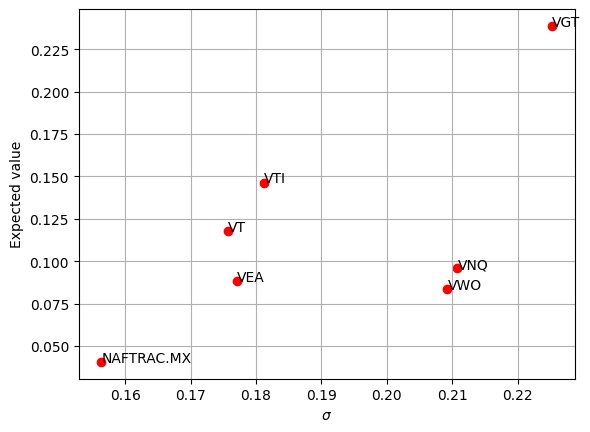

In [78]:
# Inversión en el 100% de los activos
plt.scatter(p_acciones.volatilidad, p_acciones.valor_esperado, c="r")
plt.text(p_acciones.volatilidad[0], p_acciones.valor_esperado[0], 'NAFTRAC.MX')
plt.text(p_acciones.volatilidad[1], p_acciones.valor_esperado[1], 'VEA')
plt.text(p_acciones.volatilidad[2], p_acciones.valor_esperado[2], 'VGT')
plt.text(p_acciones.volatilidad[3], p_acciones.valor_esperado[3], 'VNQ')
plt.text(p_acciones.volatilidad[4], p_acciones.valor_esperado[4], 'VT')
plt.text(p_acciones.volatilidad[5], p_acciones.valor_esperado[5], 'VTI')
plt.text(p_acciones.volatilidad[6], p_acciones.valor_esperado[6], 'VWO')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")

# Explicacion 

Como podemos ver primero tenemos que dejar que los datos nos hablen, antes de hacer nuestras interpretaciones. En este caso podemos ver como El indice NAFTRAC.MX es de los que tiene una volatilidad mas baja, por lo que algo el activo mexicano resulta ser el que tiene menor riesgo, aunque tambien presenta el menor rendimiento. 

Caso contrario al VGT que pese a que presente un rendimiento o ganancia esperado muy alta, tambien tiene mucha volatilidad, por que aqui comprabamos que a mayor ganancia hay mayor riesgo, aunque esto no es una ley.

20% Crea 10000 portafolios con los 3 ETF's y grafique los resultados

Explica la gráfica, porque es importante o interesante esta visualización

In [100]:
# Crea una función que retorne el rendimiento esperado y la varianza de un portafolio
def random_portafolio(returns):
    def rand_weights(n):
        k = np.random.rand(n)
        return k / sum(k)
    # Definimos las constantes
    means = rt.mean()
    sigma = returns.cov()
    # Obtenemos pesos
    n_act = len(rt.keys())
    w = rand_weights(n_act)
    # Rendimiento esperado
    re = w.dot(means) * 252
    # Varianza
    variance = w.dot(sigma).dot(w.T) 
    vol = np.sqrt(variance) * np.sqrt(252)
    return re, vol, w
random_portafolio(rt)

(0.11176170134496945,
 0.16715781859967532,
 array([0.1604543 , 0.18581491, 0.12210766, 0.04609763, 0.07832181,
        0.1913106 , 0.21589309]))

In [101]:
# Simula 500 portafolios 
portafolio4_act_returns = []
portafolio4_act_vol = []
weigths = []
for i in range(500):
    mu, sigma, w = random_portafolio(rt)
    portafolio4_act_returns.append(mu)
    portafolio4_act_vol.append(sigma)
    weigths.append(w)

    
df_final = pd.DataFrame()
df_final['returns'] = portafolio4_act_returns
df_final['sigma'] = portafolio4_act_vol
df_final['w'] = weigths

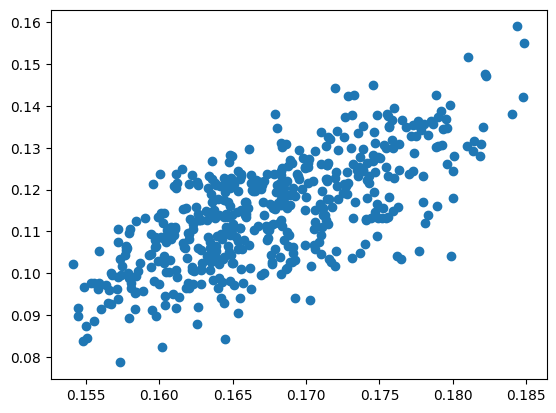

In [102]:
plt.scatter(df_final.sigma, df_final.returns)

10% ¿Cuál es el portafolio de mínima varianza?

In [103]:
df_final[df_final.sigma == df_final.sigma.min()].w.values

array([array([0.30586477, 0.14131476, 0.09873122, 0.15263443, 0.14622295,
              0.14063578, 0.01459609])                                   ],
      dtype=object)

10% Crea una regresiíon lineal con estos activos, calcula el R2, y dame la ecuación


In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
resultados_final = pd.DataFrame()
resultados_final['valor_esperado'] = rt.mean()*252
resultados_final['volatilidad'] = rt.std() * np.sqrt(252)

In [84]:
y = resultados_final[['valor_esperado']]
X = resultados_final[['volatilidad']]
model = LinearRegression().fit(X,y)

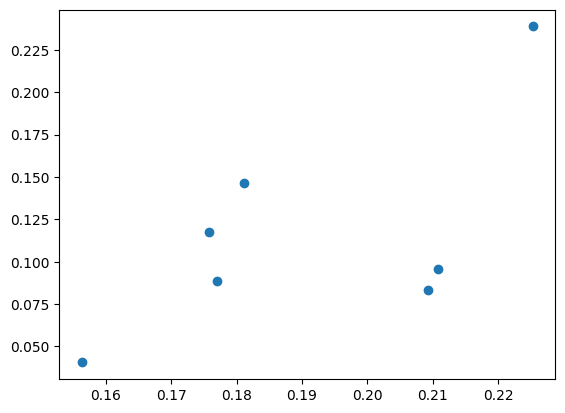

In [85]:
plt.scatter(resultados_final.volatilidad, resultados_final.valor_esperado)

In [86]:
resultados_final['predicciones'] = model.predict(X)

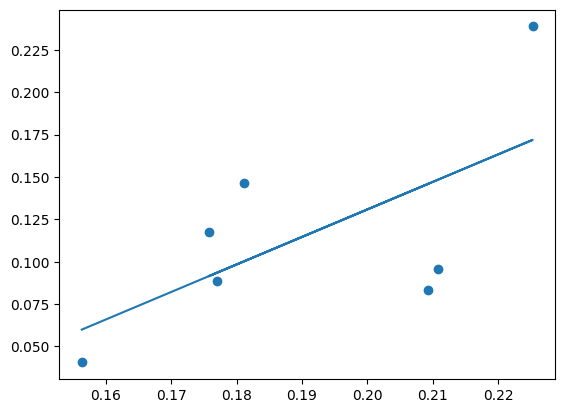

In [87]:
plt.scatter(resultados_final.volatilidad, resultados_final.valor_esperado)
plt.plot(resultados_final.volatilidad, resultados_final.predicciones)